In [8]:
import pandas as pd
import numpy as np

f_data = pd.read_csv("Clean_Dataset.csv")
f_data.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [10]:
f_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [11]:
f_data.isnull()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,False,False,False,False,False,False,False,False,False,False,False,False
300149,False,False,False,False,False,False,False,False,False,False,False,False
300150,False,False,False,False,False,False,False,False,False,False,False,False
300151,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
f_data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

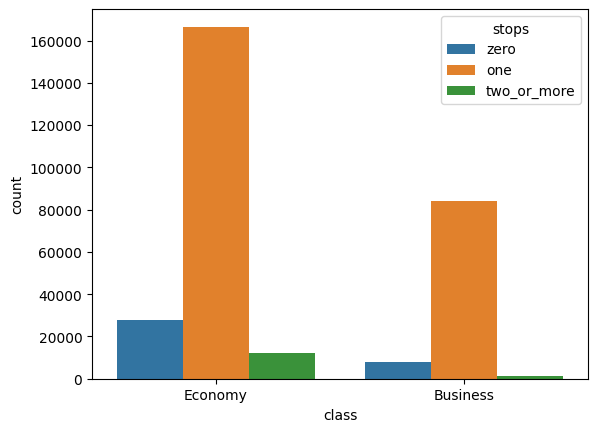

In [14]:
sns.countplot(x="class", hue="stops", data=f_data)
plt.show()

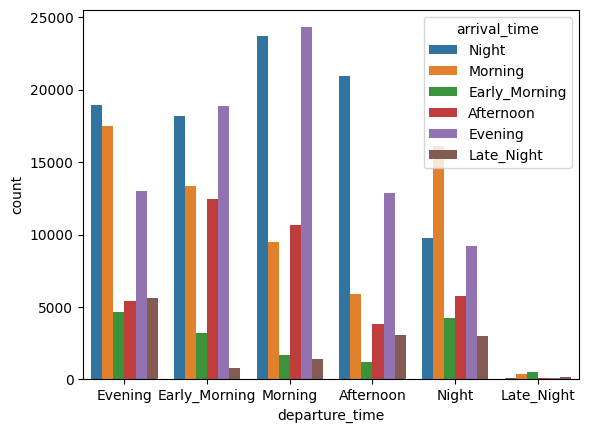

In [15]:
sns.countplot(x="departure_time", hue = "arrival_time" , data=f_data)
plt.show()

<Axes: xlabel='source_city', ylabel='count'>

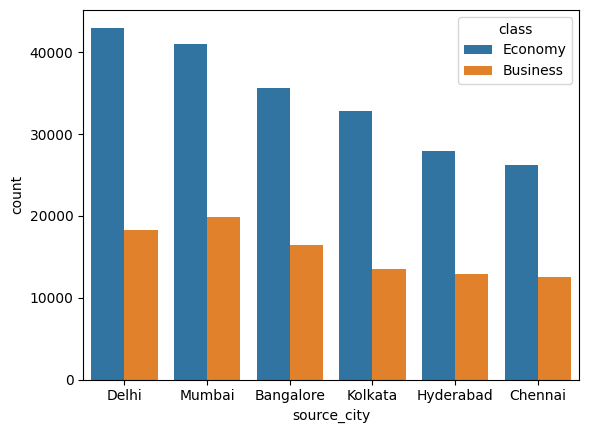

In [16]:
sns.countplot(x="source_city",hue = "class", data=f_data)

In [17]:
f_data.drop(['Unnamed: 0', 'flight'], axis=1, inplace=True)
f_data.head(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [21]:
f_data = pd.get_dummies(f_data, columns=[
    'airline',           
    'source_city',       
    'departure_time',    
    'stops',             
    'arrival_time',      
    'destination_city',  
    'class'              
], drop_first=True)

f_data = f_data.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)


In [22]:
f_data.head(5)

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,2.17,1,5953,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,1
1,2.33,1,5953,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,1
2,2.17,1,5956,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2.25,1,5955,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
4,2.33,1,5955,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,1


In [23]:
f_data.to_csv("preprocessed_flight_data.csv", index=False)

In [24]:
df = pd.read_csv("preprocessed_flight_data.csv")

# View basic statistics
print("Basic Statistics:\n", df.describe())

# Check for missing values
print("\n Missing Values:\n", df.isnull().sum())

Basic Statistics:
             duration      days_left          price  airline_Air_India  \
count  300153.000000  300153.000000  300153.000000      300153.000000   
mean       12.221021      26.004751   20889.660523           0.269503   
std         7.191997      13.561004   22697.767366           0.443702   
min         0.830000       1.000000    1105.000000           0.000000   
25%         6.830000      15.000000    4783.000000           0.000000   
50%        11.250000      26.000000    7425.000000           0.000000   
75%        16.170000      38.000000   42521.000000           1.000000   
max        49.830000      49.000000  123071.000000           1.000000   

       airline_GO_FIRST  airline_Indigo  airline_SpiceJet  airline_Vistara  \
count     300153.000000   300153.000000     300153.000000    300153.000000   
mean           0.077204        0.143660          0.030021         0.425979   
std            0.266915        0.350745          0.170646         0.494491   
min        

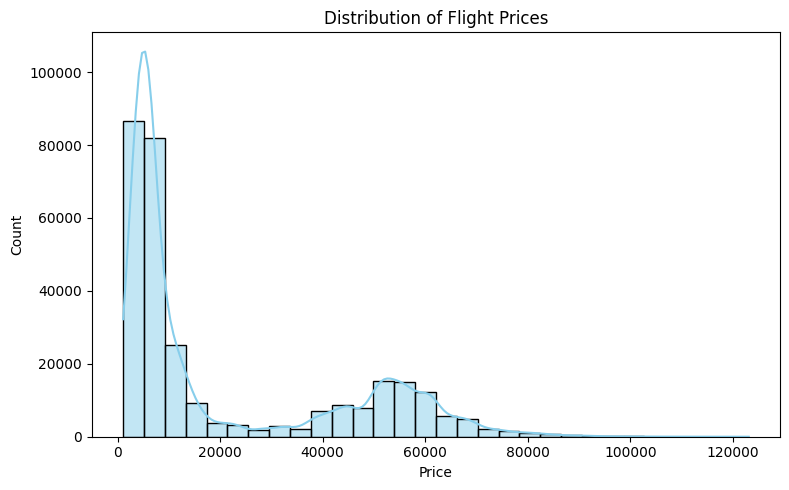

In [25]:
# Plot distribution of flight prices
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Flight Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

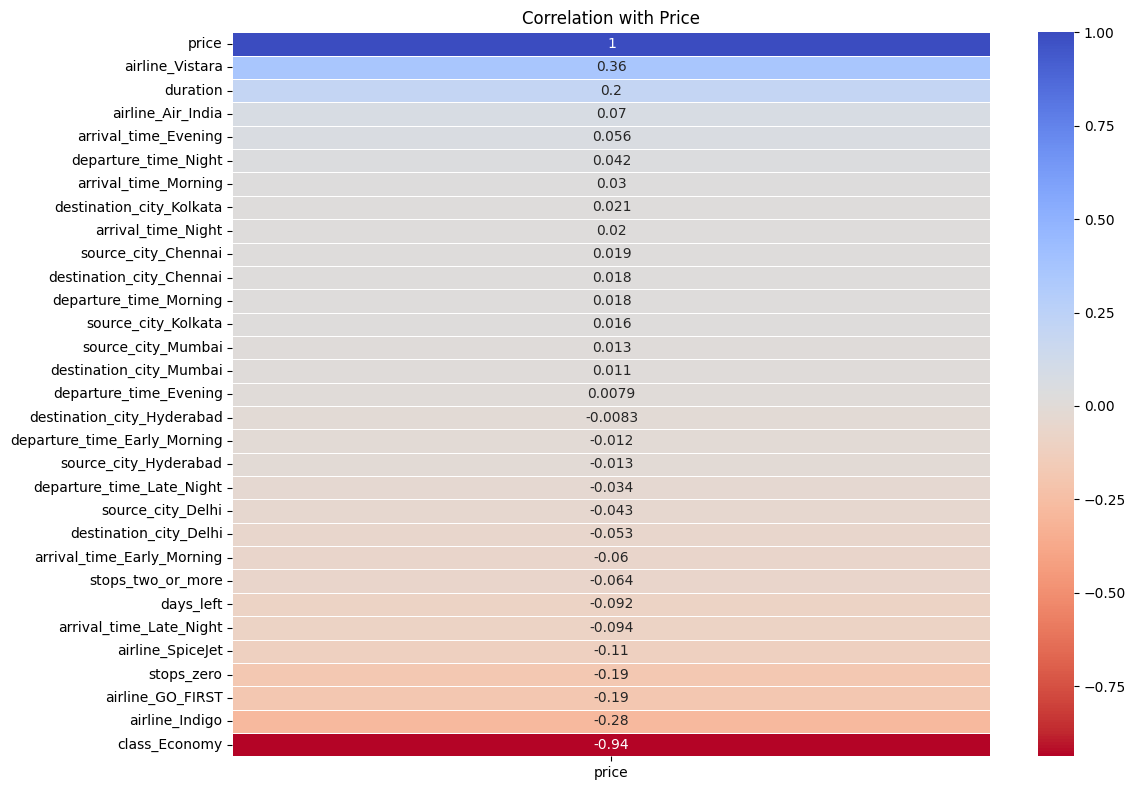

In [26]:
# Correlation heatmap with target (price)
plt.figure(figsize=(12, 8))
correlation = df.corr()
sns.heatmap(correlation[['price']].sort_values(by='price', ascending=False), 
            annot=True, cmap='coolwarm_r', linewidths=0.5)
plt.title("Correlation with Price")
plt.tight_layout()
plt.show()

In [27]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


# Split features and target
X = df.drop("price", axis=1)
y = df["price"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save model and columns
joblib.dump(model, "random_forest_model.pkl")
joblib.dump(X.columns.tolist(), "model_columns.pkl")

# Evaluate
y_pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f" Model saved\nRMSE: {rmse:.2f}\nR² Score: {r2:.4f}")


 Model saved
RMSE: 2798.39
R² Score: 0.9848


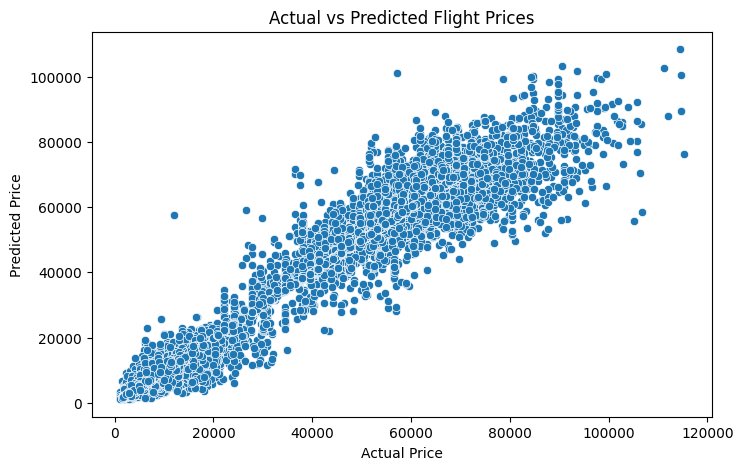

In [28]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Flight Prices")
plt.show()


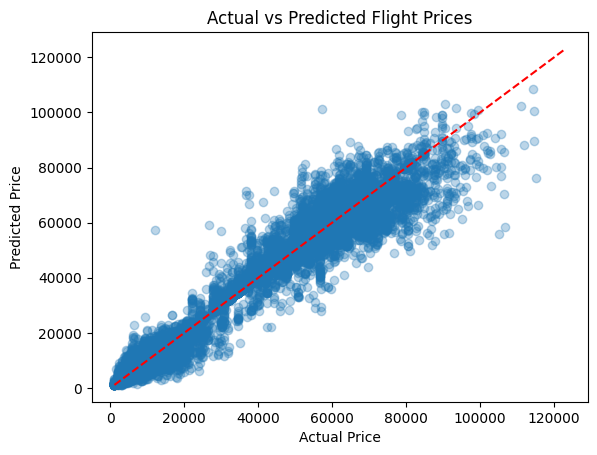

In [29]:
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Flight Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Perfect prediction line
plt.show()


In [30]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (₹): {mae:.2f}")


Mean Absolute Error (₹): 1085.83


In [33]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {scores}")
print(f"Average R²: {scores.mean():.4f}")


Cross-validated R² scores: [0.56722113 0.60230653 0.55600866 0.87801578 0.23944545]
Average R²: 0.5686
